# Preprocesamiento de datos
Este notebook se encarga de:
1. Cargar los datos limpios (no normalizados)
2. Dividir el conjunto de datos en:
   - Conjunto de entrenamiento (80%)
   - Conjunto de prueba (20%)
3. Normalizar los datos usando estadísticas SOLO del conjunto de entrenamiento
4. Guardar los conjuntos normalizados y los parámetros de normalización

- Recreamos la función 'train_test_split' de la librería 'sklearn' en el archivo 'utils/preprocessing_functions.py'.
- Esta función permite dividir los datos en conjuntos: entrenamiento y prueba (train and test) de forma estratificada.
- La estratificación permite asegurar que los conjuntos de entrenamiento y test tengan una proporción similar de pacientes con y sin cáncer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sys

# Configura el estilo de visualización
plt.style.use('ggplot')
%matplotlib inline

# Añadir el directorio raíz al path para poder importar módulos personalizados
sys.path.append('..')
from utils.config import FEATURE_NAMES, RANDOM_STATE, TEST_SIZE, STRATIFY
from utils.preprocessing_functions import train_test_split

## 1. Carga de datos limpios (no normalizados)

In [2]:
print("Cargando datos limpios (no normalizados)")
df = pd.read_csv('../data/processed/cleaned_data.csv')
print(f"Dimensiones del dataset: {df.shape}")
print(f"Primeras 5 filas del dataset:")
df.head()

Cargando datos limpios (no normalizados)
Dimensiones del dataset: (569, 31)
Primeras 5 filas del dataset:


,diagnosis,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2. Análisis rápido de los datos cargados

In [3]:
print("Información del dataset:")
df.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   diagnosis  569 non-null    int64  
 1   f01        569 non-null    float64
 2   f02        569 non-null    float64
 3   f03        569 non-null    float64
 4   f04        569 non-null    float64
 5   f05        569 non-null    float64
 6   f06        569 non-null    float64
 7   f07        569 non-null    float64
 8   f08        569 non-null    float64
 9   f09        569 non-null    float64
 10  f10        569 non-null    float64
 11  f11        569 non-null    float64
 12  f12        569 non-null    float64
 13  f13        569 non-null    float64
 14  f14        569 non-null    float64
 15  f15        569 non-null    float64
 16  f16        569 non-null    float64
 17  f17        569 non-null    float64
 18  f18        569 non-null    float64
 19  f19        569 non-null  

# 3. Dividir los datos en conjuntos de entrenamiento y test
Los datos de prueba (test) los utiizaremos en la fase de predicción para evaluar la precisión del entrenamiento.

Dividiendo los datos en conjuntos de entrenamiento y prueba.
Valor de stratify en la función: True
Utilizando estratificación para mantener la proporción de clases
Tamaño de entrenamiento: 456 muestras (80% del total)
Tamaño de test:		 113 muestras (20% del total)

Distribución de clases en cada conjunto:
Entrenamiento:  {0: 286, 1: 170}
Prueba: 	{0: 71, 1: 42}


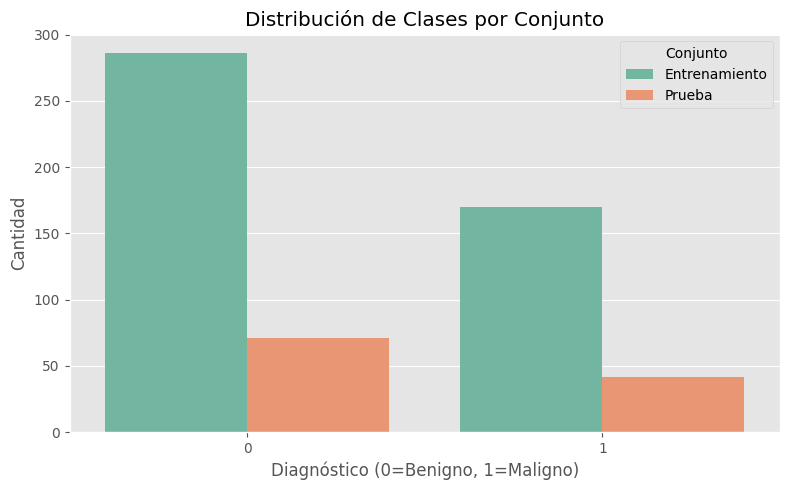

In [4]:
print("Dividiendo los datos en conjuntos de entrenamiento y prueba.")

# Separar características (X) y etiquetas (y)
X = df.drop('diagnosis', axis=1)    # todas las columnas salvo 'diagnosis'
y = df['diagnosis']                 # la variable dependiente es 'diagnosis'

# División: 80% para entrenamiento, 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, 
                                                  random_state=RANDOM_STATE, 
                                                  stratify=STRATIFY)

print(f"Tamaño de entrenamiento: {len(X_train)} muestras ({len(X_train)/len(df):.0%} del total)")
print(f"Tamaño de test:\t\t {len(X_test)} muestras ({len(X_test)/len(df):.0%} del total)")

# Verificar la distribución de clases en cada conjunto
print("\nDistribución de clases en cada conjunto:")
print(f"Entrenamiento:  {y_train.value_counts().to_dict()}")
print(f"Prueba: \t{y_test.value_counts().to_dict()}")

# Gráfico de distribución de clases por conjunto
# Crear un DataFrame largo para usar con seaborn
class_dist = []
for label, count in y_train.value_counts().items():
    class_dist.append({'Diagnóstico': label, 'Conjunto': 'Entrenamiento', 'Cantidad': count})
for label, count in y_test.value_counts().items():
    class_dist.append({'Diagnóstico': label, 'Conjunto': 'Prueba', 'Cantidad': count})
class_dist_df = pd.DataFrame(class_dist)

plt.figure(figsize=(8, 5))
sns.barplot(data=class_dist_df, x='Diagnóstico', y='Cantidad', hue='Conjunto', palette='Set2')
plt.title('Distribución de Clases por Conjunto')
plt.xlabel('Diagnóstico (0=Benigno, 1=Maligno)')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.savefig('../output/figures/class_distribution_by_set.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Normalización de datos (Z-score)
La normalización:
- ayuda a que el algoritmo de aprendizaje converja más rápido y
- evita que algunas características dominen el proceso de entrenamiento debido a diferencias de escala

In [5]:
print("Normalizando datos con Z-score usando SOLO estadísticas del conjunto de entrenamiento.")

# Calcular estadísticas SOLO con los datos de entrenamiento
mean_train = X_train.mean()
std_train = X_train.std()

# Aplicar normalización Z-score
# Fórmula: X_normalizado = (X - media) / desviación_estándar
X_train_norm = (X_train - mean_train) / std_train
X_test_norm = (X_test - mean_train) / std_train

# Guardar parámetros de normalización para uso futuro
normalization_params = {
    'means': mean_train.to_dict(),
    'stds': std_train.to_dict()
}

with open('../output/normalization_params.json', 'w') as f:
    json.dump(normalization_params, f, indent=4)
print(f"Guardados parámetros de normalización en ../output/normalization_params.json")

Normalizando datos con Z-score usando SOLO estadísticas del conjunto de entrenamiento.
Guardados parámetros de normalización en ../output/normalization_params.json


## 5. Guardar los conjuntos de datos procesados

In [6]:
print("Guardando conjuntos de datos procesados.")
X_train_norm.insert(0, 'diagnosis', y_train)
X_test_norm.insert(0, 'diagnosis', y_test)
X_train_norm.to_csv('../data/processed/train_set_normalized.csv', index=False)
X_test_norm.to_csv('../data/processed/test_set_normalized.csv', index=False)
print("Datos guardados en CSV siendo la primera columna 'diagnosis'")

Guardando conjuntos de datos procesados.
Datos guardados en CSV siendo la primera columna 'diagnosis'


# 6. Verificación de distribuciones normalizadas

Verificando distribuciones normalizadas.


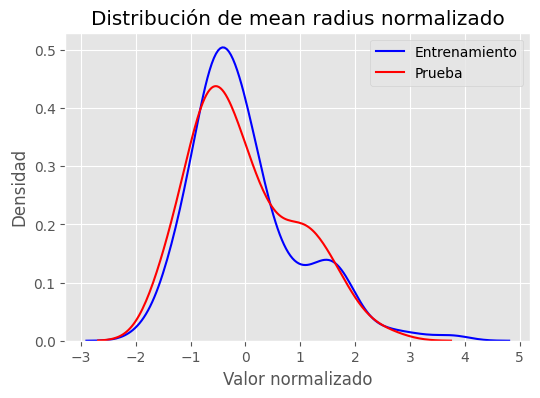

In [7]:
print("Verificando distribuciones normalizadas.")
plt.figure(figsize=(6, 4))
sns.kdeplot(X_train_norm['f01'], label='Entrenamiento', color='blue')
sns.kdeplot(X_test_norm['f01'], label='Prueba', color='red')
plt.title('Distribución de mean radius normalizado')
plt.xlabel('Valor normalizado')
plt.ylabel('Densidad')
plt.legend()
plt.savefig('../output/figures/feature_distribution_f01.png', dpi=300)
plt.show()

## 7. Resumen
Normalización:
- Método: Z-score manual (X - media) / desviación estándar
- Estadísticas calculadas SOLO con datos de entrenamiento
- Mismos parámetros aplicados al conjunto de prueba
- Los parámetros de normalización se guardan para uso futuro en la fase de predicción

Archivos generados:
- 'data/processed/train_set_normalized.csv'
- 'data/processed/test_set_normalized.csv'
- 'output/normalization_params.json'

In [11]:
print(f"Dataset original: {len(df)} muestras, {df.shape[1]} características")
print("\nDivisión de datos:")
print(f"- Entrenamiento: {len(X_train)} muestras ({len(X_train)/len(df):.0%})")
print(f"- Prueba:\t {len(X_test)} muestras ({len(X_test)/len(df):.0%})")

Dataset original: 569 muestras, 31 características

División de datos:
- Entrenamiento: 456 muestras (80%)
- Prueba:	 113 muestras (20%)
